<a href="https://colab.research.google.com/github/adithyabalakumar/EVA-4/blob/master/S8/s8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/S8/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/S8


# Import Libraries

In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Import loader

* Initialize train and test loaders from train and test dataset respectively

* CUDA check

In [0]:
import loader

# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


# Plot training images

plane   dog  deer  deer


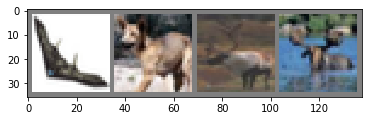

In [0]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader.trainloader_for_plot)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

Initialize network for the model

In [0]:
import model

# Model parameters

In [0]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = model.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14      

# Loss function and optimizer



In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.2)

# Training and Testing

In [0]:
import train
import test

# Training and testing our model

In [0]:
epochs = 30

for epoch in range(epochs):
  train.train(net, device, loader.trainloader, optimizer, criterion, epoch)
  test.test(net, device, loader.testloader, criterion)

Epoch= 0 Loss=1.000037431716919 Batch_id=781 Accuracy=49.37: 100%|██████████| 782/782 [01:03<00:00, 13.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0172, Accuracy: 6048/10000 (60.48%)



Epoch= 1 Loss=1.2916067838668823 Batch_id=781 Accuracy=68.49: 100%|██████████| 782/782 [01:06<00:00, 11.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0131, Accuracy: 7097/10000 (70.97%)



Epoch= 2 Loss=0.9177765846252441 Batch_id=781 Accuracy=78.04: 100%|██████████| 782/782 [01:09<00:00, 11.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0113, Accuracy: 7462/10000 (74.62%)



Epoch= 3 Loss=0.4309048056602478 Batch_id=781 Accuracy=84.61: 100%|██████████| 782/782 [01:09<00:00, 12.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0122, Accuracy: 7425/10000 (74.25%)



Epoch= 4 Loss=0.41638848185539246 Batch_id=781 Accuracy=90.25: 100%|██████████| 782/782 [01:09<00:00, 11.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0169, Accuracy: 6933/10000 (69.33%)



Epoch= 5 Loss=0.15926535427570343 Batch_id=781 Accuracy=94.35: 100%|██████████| 782/782 [01:09<00:00, 12.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0134, Accuracy: 7535/10000 (75.35%)



Epoch= 6 Loss=0.19096630811691284 Batch_id=781 Accuracy=96.84: 100%|██████████| 782/782 [01:09<00:00, 12.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0155, Accuracy: 7492/10000 (74.92%)



Epoch= 7 Loss=0.5244227647781372 Batch_id=781 Accuracy=98.16: 100%|██████████| 782/782 [01:09<00:00, 11.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0131, Accuracy: 7797/10000 (77.97%)



Epoch= 8 Loss=0.10053038597106934 Batch_id=781 Accuracy=98.42: 100%|██████████| 782/782 [01:09<00:00, 11.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0140, Accuracy: 7733/10000 (77.33%)



Epoch= 9 Loss=0.09967413544654846 Batch_id=781 Accuracy=99.29: 100%|██████████| 782/782 [01:09<00:00, 11.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0162, Accuracy: 7573/10000 (75.73%)



Epoch= 10 Loss=0.11744612455368042 Batch_id=781 Accuracy=99.45: 100%|██████████| 782/782 [01:09<00:00, 11.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0157, Accuracy: 7683/10000 (76.83%)



Epoch= 11 Loss=0.02257019281387329 Batch_id=781 Accuracy=99.55: 100%|██████████| 782/782 [01:09<00:00, 11.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0151, Accuracy: 7780/10000 (77.80%)



Epoch= 12 Loss=0.026003360748291016 Batch_id=781 Accuracy=99.88: 100%|██████████| 782/782 [01:09<00:00, 11.29it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 7986/10000 (79.86%)



Epoch= 13 Loss=0.024516940116882324 Batch_id=781 Accuracy=99.98: 100%|██████████| 782/782 [01:09<00:00, 11.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0134, Accuracy: 8016/10000 (80.16%)



Epoch= 14 Loss=0.02004256844520569 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:09<00:00, 11.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0131, Accuracy: 8088/10000 (80.88%)



Epoch= 15 Loss=0.001400291919708252 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:09<00:00, 11.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0131, Accuracy: 8100/10000 (81.00%)



Epoch= 16 Loss=0.0002034306526184082 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:09<00:00, 11.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0132, Accuracy: 8075/10000 (80.75%)



Epoch= 17 Loss=0.019399821758270264 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:09<00:00, 11.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0131, Accuracy: 8069/10000 (80.69%)



Epoch= 18 Loss=0.004490077495574951 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:09<00:00, 12.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0132, Accuracy: 8070/10000 (80.70%)



Epoch= 19 Loss=0.0002371072769165039 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:09<00:00, 11.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0134, Accuracy: 8078/10000 (80.78%)



Epoch= 20 Loss=0.19603034853935242 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:09<00:00, 11.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0133, Accuracy: 8084/10000 (80.84%)



Epoch= 21 Loss=0.0073996782302856445 Batch_id=781 Accuracy=99.99: 100%|██████████| 782/782 [01:09<00:00, 11.25it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 8038/10000 (80.38%)



Epoch= 22 Loss=0.003560006618499756 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:09<00:00, 11.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 8052/10000 (80.52%)



Epoch= 23 Loss=0.0015224814414978027 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:09<00:00, 11.27it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0135, Accuracy: 8034/10000 (80.34%)



Epoch= 24 Loss=0.000500798225402832 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:09<00:00, 11.22it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0135, Accuracy: 8056/10000 (80.56%)



Epoch= 25 Loss=0.0002937912940979004 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:10<00:00, 12.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0137, Accuracy: 8074/10000 (80.74%)



Epoch= 26 Loss=0.008187979459762573 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:09<00:00, 11.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 8081/10000 (80.81%)



Epoch= 27 Loss=0.07034850120544434 Batch_id=781 Accuracy=100.00: 100%|██████████| 782/782 [01:09<00:00, 12.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0136, Accuracy: 8072/10000 (80.72%)



Epoch= 28 Loss=0.0059661865234375 Batch_id=781 Accuracy=99.99: 100%|██████████| 782/782 [01:09<00:00, 11.23it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0141, Accuracy: 7999/10000 (79.99%)



Epoch= 29 Loss=0.11647051572799683 Batch_id=781 Accuracy=99.99: 100%|██████████| 782/782 [01:09<00:00, 11.17it/s]



Validation set: Average loss: 0.0139, Accuracy: 8042/10000 (80.42%)



# Result visualization

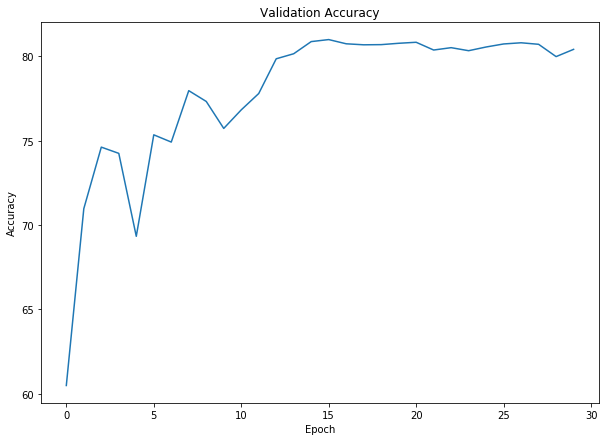

In [0]:
val_acc_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.plot(test.test_acc)
axs.set_title("Validation Accuracy")
axs.set_xlabel("Epoch")
axs.set_ylabel("Accuracy")
val_acc_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S8/validation_accuracy_change_plot.jpg')

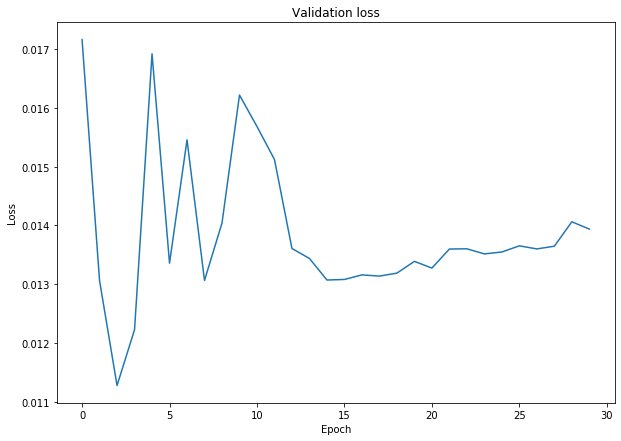

In [0]:
val_loss_fig, axs = plt.subplots(1,1,figsize=(10,7))

axs.plot(test.test_losses)
axs.set_title("Validation loss")
axs.set_xlabel("Epoch")
axs.set_ylabel("Loss")
val_loss_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S8/validation_loss_change_plot.jpg')

GroundTruth:    dog horse   car  deer


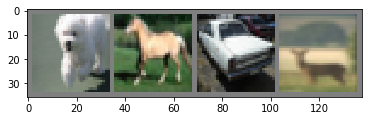

In [0]:
dataiter = iter(loader.testloader_for_plot)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = net(images.cuda())

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [0]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog horse   car  deer


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [0]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(loader.testloader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = net(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1


for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

100%|██████████| 157/157 [00:03<00:00, 47.73it/s]

Accuracy of plane : 79 %
Accuracy of   car : 93 %
Accuracy of  bird : 74 %
Accuracy of   cat : 65 %
Accuracy of  deer : 75 %
Accuracy of   dog : 68 %
Accuracy of  frog : 84 %
Accuracy of horse : 89 %
Accuracy of  ship : 88 %
Accuracy of truck : 84 %
